In [1]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

Pertenece en la familia de los algoritmos no supervisados\
Categoriza las entradas de un dataset en segmentos

El objetivo del clustering es agrupar los datos que presenten ciertas semejanzas entre sus miembros, que se parezcan.\
Ademas, busca los datos que pertenezcan a grupos diferentes tengan rasgos lo suficientemente distintos entre si. 

#### Concepto de distancia

* Distancia de Manhathan
* Distancia Euclidea(es la que mas se usa)
* Distancia de Minkowki, distance_matrix en python con p=2

Se debe normalizar las distancias para el calculo de la matrix de distancias

<h3>$ Z_{i,j} = \frac{x_{ij} - min_{x*j}}{max_{x*j}-min_{x*j}} $</h3>

In [11]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'movies/movies.csv', sep=';')
movies = df.columns.values.tolist()[1:]

In [4]:
dd1 = distance_matrix(df[movies], df[movies], p=1)#Manhathan
dd2 = distance_matrix(df[movies], df[movies], p=2)#Euclideana 
dd10 = distance_matrix(df[movies], df[movies], p=10)

In [5]:
#Volviendo las distancias en un dataframe
def dm_to_df(dd, col_name):
    return pd.DataFrame(dd,index=col_name, columns=col_name)

dm_to_df(dd1, df['user_id'])
dm_to_df(dd2, df['user_id'])
dm_to_df(dd10, df['user_id'])


user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


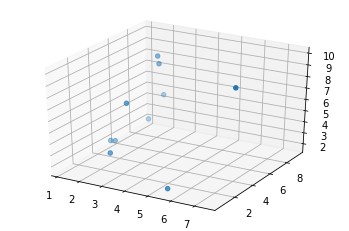

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # El 111 es una escala preliminar, de 0 a 1
ax.scatter(xs=df['star_wars'], ys=df['lord_of_the_rings'], zs=df['harry_potter'])

### Metodos jerarquicos

Se dividen:
* Aglomerativo(ascendentes) este une para englobar todo en un solo cluster
* Disociativo(descendetes) hace lo distinto de al anterior


### Metodos de enlace

* Enlace simple(distancia minima)\
* Enlace completo(distancia maxima)\
* Enlace promedio(distancia promedio)\ 
* Enlace del centroide(baricentro, punto medio)\
* Enlace de Ward, minimiza el incremento del error combinado en la suma de los cuadrados de las varianzas que unen a un cluster ya existente para formar uno nuevo. 

### Clustering jerarquico 

Es un metodo aglomerativo donde cada punto empieza siendo un unico cluster y cada paso se va juntado hasta tener un unico cluster basado en las similitudes entre observaciones. 

## Enlaces

In [7]:
ddd1 = dm_to_df(dd1, df['user_id'])
#ddd1
z = []
ddd1[11]= ddd1[1]+ddd1[10]
ddd1.loc[11] = ddd1.loc[1] + ddd1.loc[10]
z.append([1,10,0.7,2])
ddd1

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [8]:
for i in ddd1.columns.values.tolist():
    ddd1.loc[11][i]= min(ddd1.loc[1][i], ddd1.loc[10][i])
    ddd1.loc[i][11]= min(ddd1.loc[i][1], ddd1.loc[i][10])
    
ddd1

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [9]:
ddd1 = ddd1.drop([1,10])
ddd1 = ddd1.drop([1,10], axis=1)
ddd1

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [10]:
x=2
y=7
n=12

#z = []
ddd1[n]= ddd1[x]+ddd1[y]

ddd1.loc[n] = ddd1.loc[x] + ddd1.loc[y]
z.append([x,y,ddd1.loc[x][y],2])

for i in ddd1.columns.values.tolist():
    ddd1.loc[n][i]= min(ddd1.loc[x][i], ddd1.loc[y][i])
    ddd1.loc[i][n]= min(ddd1.loc[i][x], ddd1.loc[i][y])
    
ddd1 = ddd1.drop([x,y])
ddd1 = ddd1.drop([x,y], axis=1)
ddd1

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [11]:
x=5
y=8
n=13

#z = []
ddd1[n]= ddd1[x]+ddd1[y]

ddd1.loc[n] = ddd1.loc[x] + ddd1.loc[y]
z.append([x,y,ddd1.loc[x][y],2])

for i in ddd1.columns.values.tolist():
    ddd1.loc[n][i]= min(ddd1.loc[x][i], ddd1.loc[y][i])
    ddd1.loc[i][n]= min(ddd1.loc[i][x], ddd1.loc[i][y])
    
ddd1 = ddd1.drop([x,y])
ddd1 = ddd1.drop([x,y], axis=1)
ddd1

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


El procedimiento anterior se debe repetir hasta que quede una matriz de 1x1 con la un cluster que englobe todo. 

### Clusterin jerarquico usando python

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [13]:
#df[movies]
w = linkage(df[movies], 'ward')
w

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Dendograma jerarquico del Clustering')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [45.0, 45.0, 71.25, 71.25],
  [20.0, 20.0, 58.125, 58.125]],
 'dcoord': [[0.0, 0.6164414002968973, 0.6164414002968973, 0.0],
  [0.0, 2.16794833886788, 2.16794833886788, 0.0],
  [0.6164414002968973, 6.664082832618455, 6.664082832618455, 2.16794833886788],
  [0.0, 3.4828149534535995, 3.4828149534535995, 0.0],
  [0.0, 0.412310562561766, 0.412310562561766, 0.0],
  [0.0, 5.294336596779619, 5.294336596779619, 0.412310562561766],
  [3.4828149534535995,
   6.593178292750774,
   6.593178292750774,
   5.294336596779619],
  [0.0, 10.623558725775464, 10.623558725775464, 6.593178292750774],
  [6.664082832618455,
   12.815693504449923,
   12.815693504449923,
   10.623558725775464]],
 'ivl': ['1', '6', '4', '7', '2', '3', '8', '5', '0', '9'],
 'leaves': [1, 6, 4, 7, 2, 3, 8, 5, 0, 9],
 'color_list'

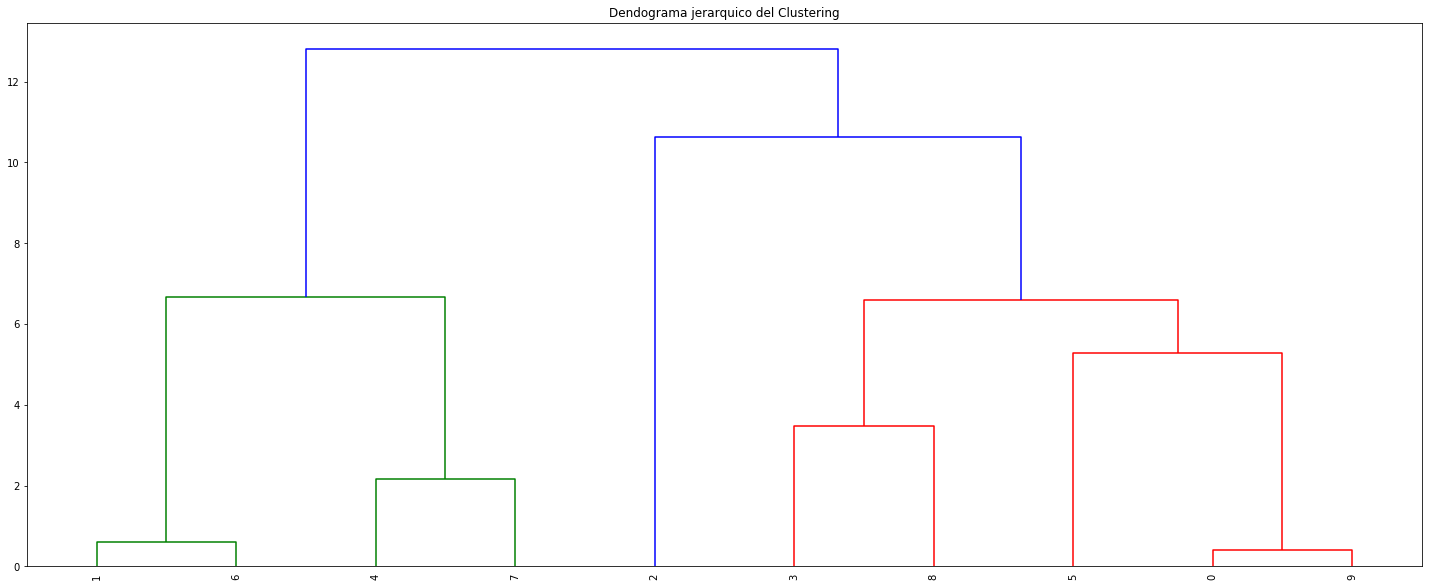

In [14]:
plt.figure(figsize=(25,10))
plt.title('Dendograma jerarquico del Clustering')
dendrogram(w, leaf_rotation=90.,leaf_font_size = 10.0)
plt.show()

## Clustering jerarquico y dendrograma

* X dataset(array de nxm) de puntos a clusterizar
* n numeros de datos 
* m numero de rasgos
* Z array de enlace de cluster con la informacion de las uniones
* K numero de clusters

(150, 2)


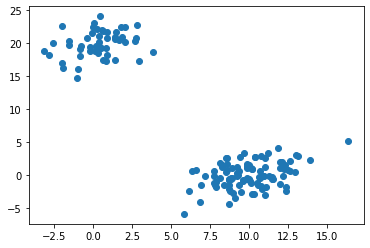

In [15]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0], [[3,1],[1,4]], size=[100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()


In [16]:
Z = linkage(X,'ward')
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [17]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [18]:
c, coph_dist= cophenet(Z, pdist(X))
c

0.9800148387574268

In [19]:
Z[0]
#n-1
#Unio al elemento 52 y 53 del dataset con una distancia de 0.0415, solo unio 2.

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [20]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

<Figure size 720x576 with 0 Axes>

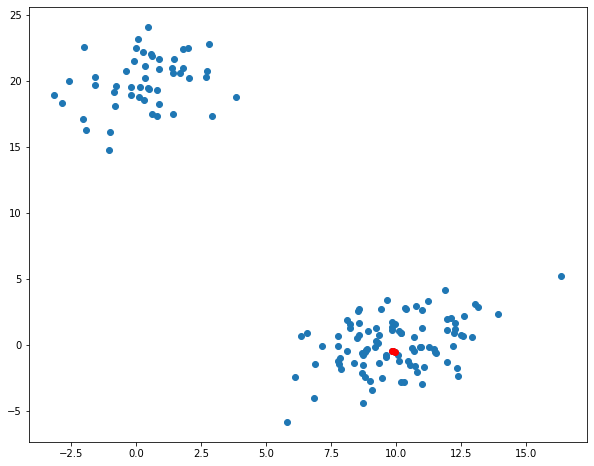

In [21]:
ids = [33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[ids,0],X[ids,1], c='r')
plt.show()

### Representacion grafica de un dendrograma 

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Dendrograma del clustering jerarquico')

Text(0.5, 0, 'Indices de la muestra')

Text(0, 0.5, 'Distancias')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [113.75, 113.75, 160.0, 160.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [185.0, 185.0, 203.75, 203.75],
  [136.875, 136.875, 194.375, 194.375],
  [39.375, 39.375, 165.625, 165.625],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [300.0, 300.0,

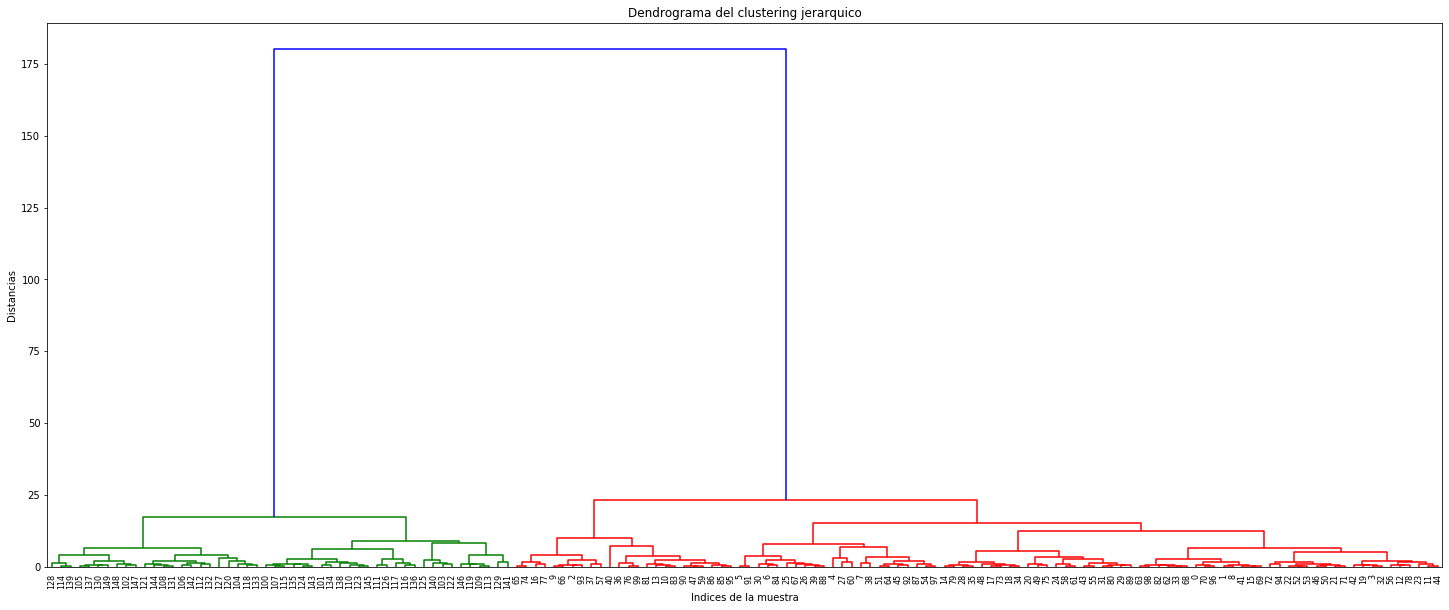

In [22]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del clustering jerarquico')
plt.xlabel('Indices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

In [23]:
Z[-4:]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma 

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Dendrograma del clustering jerarquico')

Text(0.5, 0, 'Indices de la muestra')

Text(0, 0.5, 'Distancias')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
  [0.0, 12.42734657224792, 12.42734657224792, 0.0],
  [7.868785423127422,
   15.115331182663091,
   15.115331182663091,
   12.42734657224792],
  [9.844278294486319,
   23.121989355286757,
   23.121989355286757,
   15.115331182663091],
  [17.1152

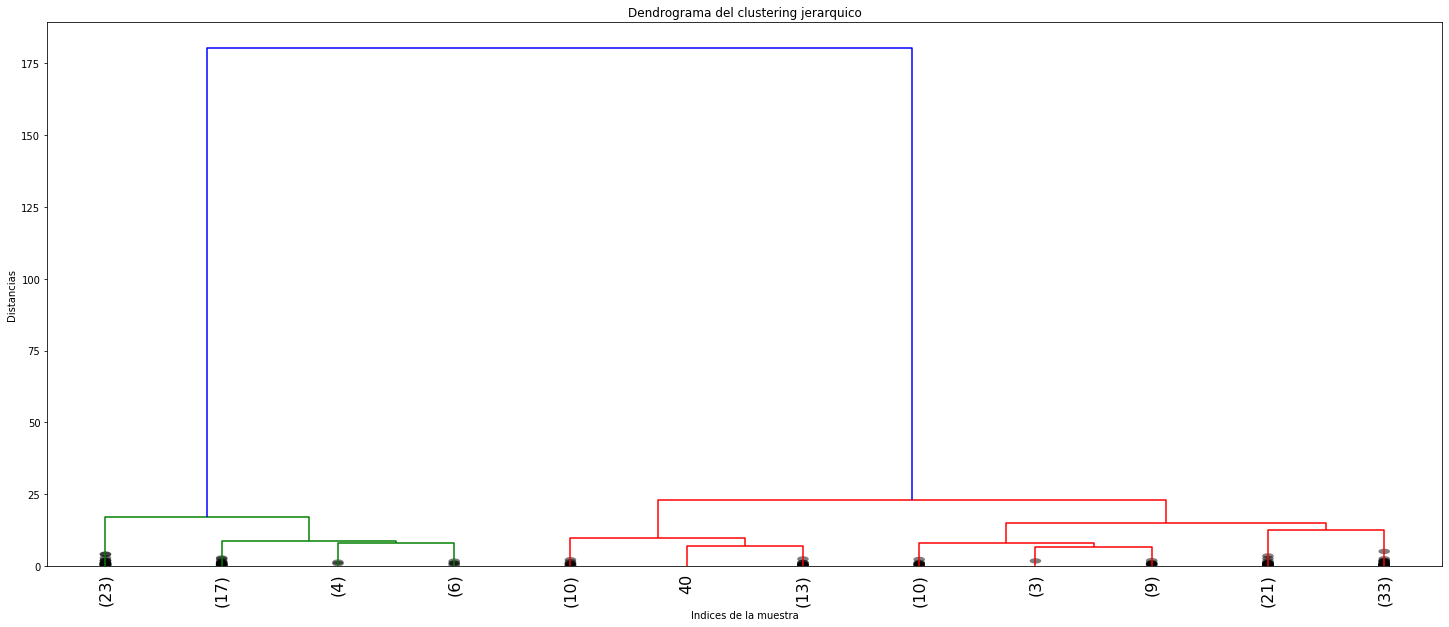

In [24]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del clustering jerarquico')
plt.xlabel('Indices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=16.0, color_threshold=0.7*180,
          truncate_mode='lastp', p=12, show_leaf_counts=True, show_contracted=True)
plt.show()

In [25]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotata_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerarquico con Dendrograma truncado')
        plt.xlabel('Indice de dataset o tamano del cluster')
        plt.ylabel('Distancia')
        for i, d, c in zip(ddata['iccord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotata_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), textcoords = 'offset points', va='top', ha='center')
                
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata
        

In [26]:
dendrogram_tune(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contrated=True, annotate_above=10)
plt.show()


TypeError: dendrogram() got an unexpected keyword argument 'show_contrated'

## El metodo de K-means

In [ ]:
data = np.random.random(90).reshape(30,3)
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
cluster_centers = np.vstack([data[c1], data[c2]]) #vstack apila los datos uno de bajo del otro. 
cluster_centers

In [ ]:
#Paquete de Scipy
from scipy.cluster.vq import vq

vq(data, cluster_centers)

In [ ]:
from scipy.cluster.vq import kmeans

In [ ]:
kmeans(data,cluster_centers)

In [ ]:
kmeans(data,2)

# Clusterin con Python - Seleccion de vinos

In [ ]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
dv = pd.read_csv(mainpath+'wine/winequality-red.csv', sep=';')
dv.shape

In [ ]:
plt.hist(dv['quality'])

In [ ]:
dv.groupby(['quality']).mean()

In [ ]:
#normalizar los datos
dn = (dv-dv.min())/(dv.max()-dv.min())
dn.head()

## Utilizando un clustering jerarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clus = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(dn)
md_h = pd.Series(clus.labels_)
plt.hist(md_h)
clus.children_

In [ ]:
S = linkage(dn, 'ward')
S

plt.figure(figsize=(25,10))
plt.title('Dnedrograma de los vinos')
dendrogram(S, leaf_rotation=90, leaf_font_size=8)
plt.show()

## Utilizando un K-means

In [47]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
model = KMeans(n_clusters=6)
model.fit(dn)

model.labels_

md_k = pd.Series(model.labels_)

In [ ]:
dn['clust_h']= md_h
dn['clust_k']= md_k
dn.head()

In [ ]:
plt.hist(md_k)

In [ ]:
#Obteniendo los centroides
model.cluster_centers_

In [ ]:
#Suma de los cuadrados internos, factor de eficiencia, valor a utilizar en el metodo del codo. 
model.inertia_

### Interpretacion final

In [ ]:
dn.groupby('clust_k').mean()
# Por ejemplo: 
# Personas que les gusta el nivel de alcohol, debe de elegir entre los cluster 0 y 1. 


## El metodo del codo

* Es un metodo utilizado para encontrar el valor de K clustes optimo, en el metodo de kmeans. Entre mas clusters, mayor la suma de los cuadrados. 
* 

## El coeficiente de silueta $S_{i}$

* Como de bien el punto esta unido al resto de puntos de su cluster $a_{i}$
* Como de bien esta el punto seprado de los puntos del cluster vecino mas cercano $b_{i}$
* $-1\leq S_{i}\leq 1  $, cuando S tienen a 1, el puntos esta bien clasificado. Cuando tienden a -1, el punto estaria mejor en su cluster vecino. 
* El promedio de S sobre todos los puntos nos informa de como de bien estan agrupados en el cluster.

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [ ]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Dataset a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1,x2)
plt.show()

In [ ]:
# Funcion canera... 

max_k= 10 #maximo de cluster a crear
K = range(1,max_k)
ssw=[]
cmap= cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, 'euclidean'), axis=1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
## Elaboracion de una silueta. 

    if i<k<len(X): #Por seguridad, no se hace una silueta cuando K=1 y K=len(X)
        #Se crea un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplot(1,2)
        fig.set_size_inches(20,8)
        
        
        #El primer subplot contendra la silueta que puede tener valores desde -1 a 1
        #En nuestro caso ya controlamos los valores entre -0.1 y 1 
        
        axis1.set_xlim = ([-0.1, 1.0])
        #El # de clusters a insertar determinara el tamano de cada barra
        #El coeficiente (n_clusters*10) sera el espacio en blanco que dejaremos entre silueta individuales de cada clusters 
        #para separarlas. 
        
        axis1.set_ylim([0, len(X) +(k+1*10)])
        silhouette_avg = silhouette_score(X,labels) 
        print('* Para k=', k ,'el promedio de la silueta es de:',silhouette_avg)
        sample_silhouette_values = silhouette_samples(X,labels)
        
        y_lower =10 
        
        for i in range(k):
            #Se agrega la silueta del cluster i-esimo
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print('  -Para i=', i+1,'la silueta del cluster vale:', np.mean(ith_cluster_sv))
            # Se ordena descendientemente las siluetas del cluster i-esimo
            ith_cluster_sv.sort()
            
            #se calcula donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size 
            
            #Se elije el color del cluster
            color = color_palette[i]
            
            axis.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor=color, alpha=0.7)
            
            #Se etiqueta dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            #Se calcula el nuevo y_lower para el siguiente cluster del grafico
            y_lower = y_lower+10 # se dejan vacias 10 muestras 
        
        axis1.set_title('Rrepresentacion de la silueta k =%s '%str(k))
        axis1.set_xlabel('S(i)')
        axis1.set_ylabel('ID del cluster')
        
    #Plot de los k-means con lus puntos recursivos    
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('Clustering para k=%s' %str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette, marker='x')
    plt.show()


In [ ]:
#Representacion del codo normalizado

plt.plot(K, 1-ssw/sst, 'bx-')
plt.xlabel('k')
plt.ylabel('1-norm(SSW(k))')
plt.title('La tecnica del codo normalizado para encontrar el k optimo')
plt.show()

# Propagacion de la afinidad

In [28]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

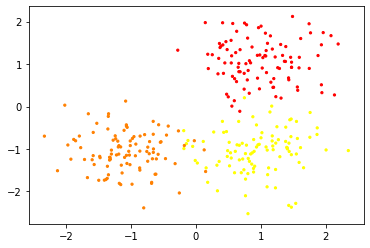

In [31]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels= make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)
from itertools import cycle 
plt.scatter(X[:,0], X[:,1], c=labels, s=5, cmap ='autumn')

In [ ]:
af= AffinityPropagation(preference=-50).fit(X)
cluster_centers_ids = af.cluster_centers_indices_
labels = af.labels_
n_clust = len(cluster_centers_ids)

In [36]:
def report_affininity_propagation(af):
    af= AffinityPropagation(preference=-50).fit(X)
    cluster_centers_ids = af.cluster_centers_indices_
    n_clust = len(cluster_centers_ids)
    clust_labels = af.labels_
    
    metrics.homogeneity_score
    
    print('Numero estimado de clusters: %d'%n_clust)
    print('Homogeneidad: %0.3f' % metrics.homogeneity_score(labels, clust_labels))
    print('Complentitud: %0.3f'% metrics.completeness_score(labels, clust_labels))
    print('V-measure: %0.3f' %metrics.v_measure_score(labels, clust_labels))
    print('R2 ajustado: %0.3f'% metrics.adjusted_rand_score(labels, clust_labels))
    print('Informacion mutua ajustada: %0.3f' %metrics.adjusted_mutual_info_score(labels, clust_labels))
    print('Coeficiente de la silueta: %0.3f' %metrics.silhouette_score(X, labels, metric='sqeuclidean'))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
    
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_centers_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col+'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
            
    plt.title('Numero estimado de clusters %d' %n_clust)
    plt.show()
    
    
    
    
    
    
    

Numero estimado de clusters: 3
Homogeneidad: 0.872
Complentitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


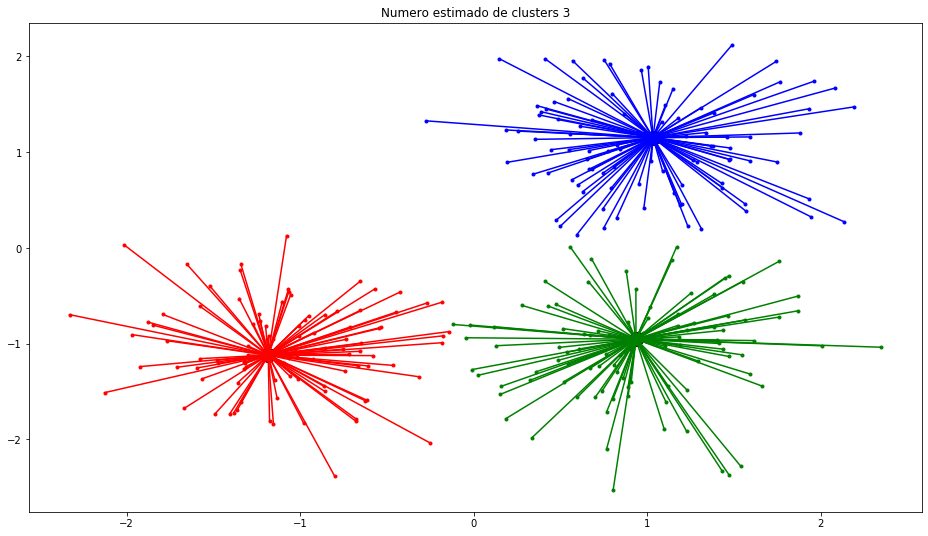

In [37]:
report_affininity_propagation(X)

# K-Medoides

Distribuciones en forma de anillo

In [9]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd

In [10]:
def ring(r_min = 0, r_max=1, n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)



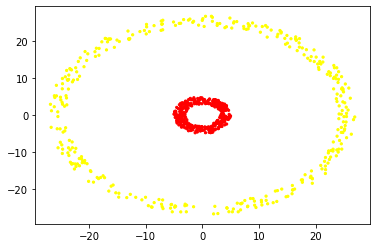

In [13]:
data1 = ring(3,5)
data2 = ring(24,27)

data=np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap='autumn')


## Algoritmo con kmeans

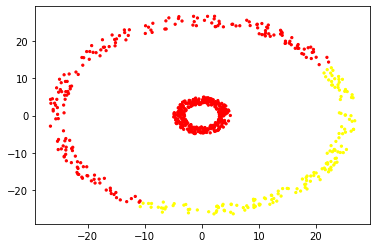

In [48]:
km = KMeans(2).fit(data)
clust = km.predict(data)
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap = 'autumn')

## Algoritmos de los K medoides

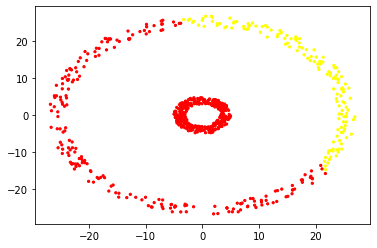

In [14]:
from pyclust import KMedoids
kmed = KMedoids(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap='autumn')


## Clustering Spectral

In [15]:
from sklearn.cluster import SpectralClustering

In [18]:
clust = SpectralClustering(2).fit_predict(data)

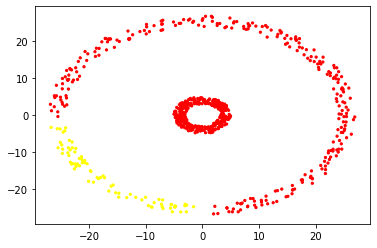

In [20]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap='autumn')

Podemos estimar la K:
    * No: Propagacion de la afinidad
    * Si: Podemos usar la distancia Euclidea:
        * Si: K-means
        * No: Buscar valores centrales:
            * Si: K-medoides
            * No: Los datos son linealmente separables
                * Si: Clustering aglomerativo
                * No: Clustering Espectral

## Resumen del clustering

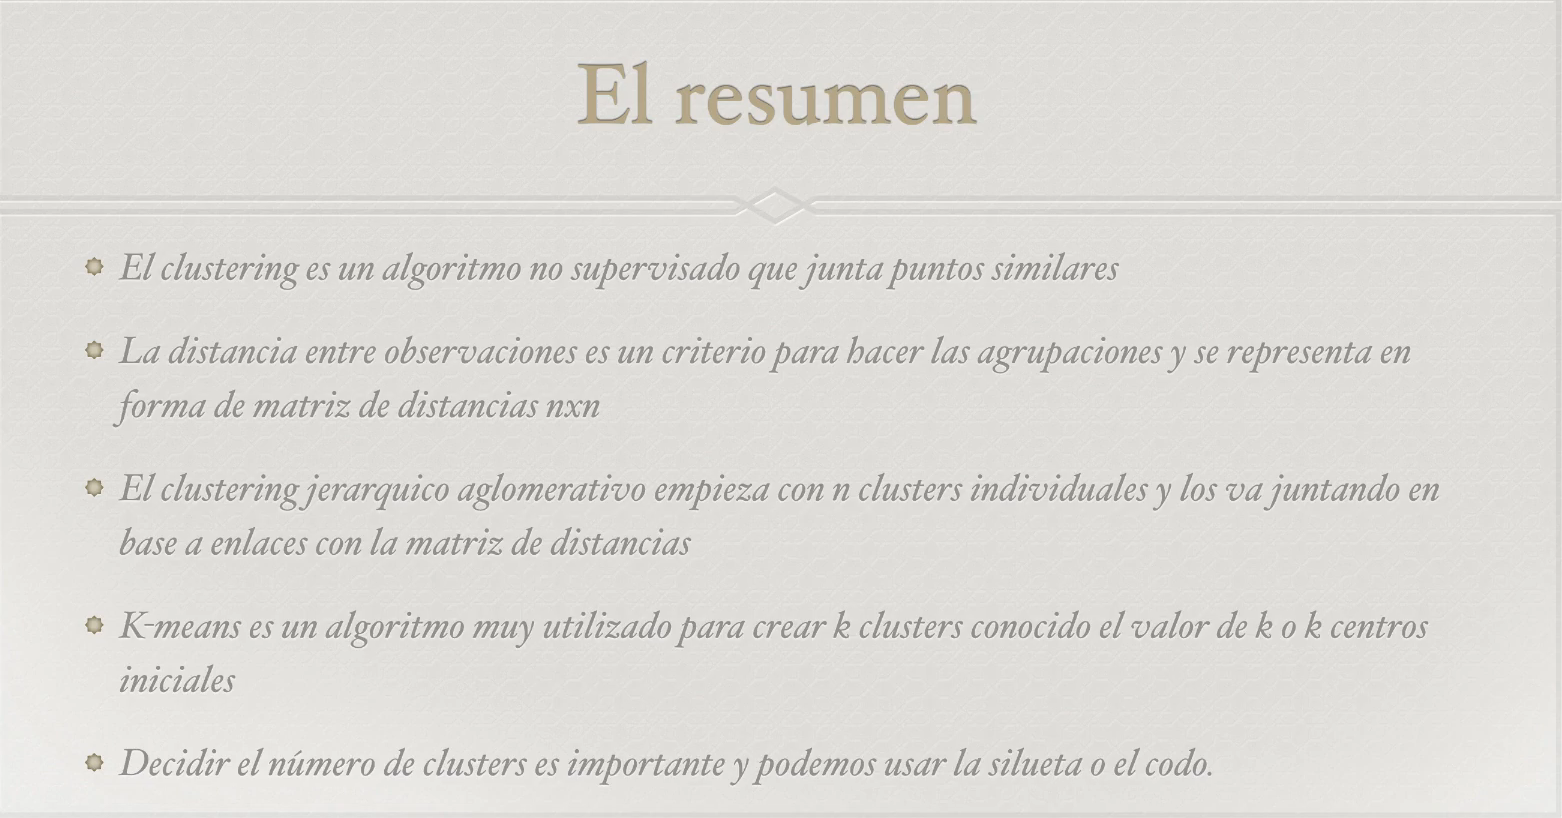